# Collecte de Données : Web Scraping Avancé des Articles de CNN"

 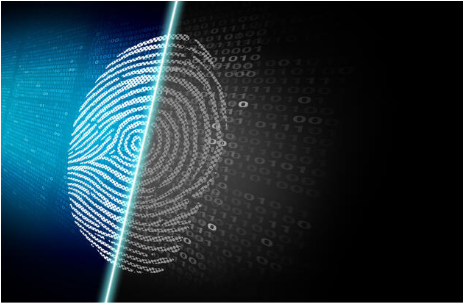

<p style="text-align: justify; font-weight: bold; font-size: 20px;">
Le ***Web Scraping*** est une technique cruciale pour collecter des données pertinentes. Il s'agit d'automatiser l'extraction d'informations à partir de pages web - en l'occurrence, des articles du site de CNN concernant la situation en Palestine. Cette méthode permet de rassembler efficacement un grand volume de textes nécessaires pour alimenter et tester les modèles de résumé automatique de texte. Le web scraping offre ainsi une base de données riche et variée, essentielle pour une analyse approfondie et représentative du sujet étudié. 
</p>









## <p style="text-align: justify; font-weight: bold; font-size: 20px; color: red;"> Installation de la bibliothèque Selenium </p>

<p style="text-align: justify; font-weight: bold; font-size: 15px;"> Selenium est une bibliothèque d'automatisation de navigateur pour Python, utilisée pour interagir avec des pages Web de manière dynamique, ce qui est particulièrement utile pour simuler la navigation sur des sites qui nécessitent des interactions comme le clic sur des boutons ou la saisie de texte dans des formulaires. Donc l’utilisation de Selenium permet d’automatiser la collecte de données sur le site de CNN.

In [1]:
!pip install selenium

## <p style="text-align: justify; font-weight: bold; font-size: 20px; color: red;"> Importation des bibliothèques nécessaires</p>

In [ ]:
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.window import WindowTypes

## <p style="text-align: justify; font-weight: bold; font-size: 20px; color: red;"> Collecte de Données</p>

In [ ]:
# Chemin vers votre ChromeDriver
webdriver_service = Service("C:/Users/pc/Downloads/chromedriver-win64/chromedriver-win64/chromedriver.exe")

# Configuration du webdriver avec le service
driver = webdriver.Chrome(service=webdriver_service)

# URL de départ
url_de_depart = "https://edition.cnn.com/search?size=10&q=gaza+israel+war+&from=0&page=1&sort=relevance&types=all&section="
driver.get(url_de_depart)

# Créer un fichier CSV pour enregistrer les données
fichier_csv = open('articles_cnn1.csv', 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(fichier_csv)
csv_writer.writerow(['Titre', 'Résumé', 'Contenu'])

### •	Configuration du WebDriver : indication de chemin où se trouve le ChromeDriver qui est nécessaire pour que Selenium lance et contrôle une instance du navigateur Chrome.

### •	Initialisation de l'Instance de Chrome :Elle crée une nouvelle instance de Chrome qui sera contrôlée par Selenium.

### •	Définition de l'URL de départ : Cette ligne définit l'URL de la page de recherche CNN sur laquelle le scraping va débuter, en utilisant des termes de recherche spécifiques pour filtrer les articles.

### •	Navigation vers l'URL 


In [3]:
try:
    while True:
        articles = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.card"))
        )

        for article in articles:
            # Extraire le titre, le résumé et l'URL de chaque article
            titre = article.find_element(By.CSS_SELECTOR, "span.container__headline-text").text
            resume = article.find_element(By.CSS_SELECTOR, "div.container__description").text
            url_article = article.find_element(By.TAG_NAME, "a").get_attribute('href')

            # Ouvrir l'URL de l'article dans un nouvel onglet
            driver.execute_script("window.open('');")
            driver.switch_to.window(driver.window_handles[1])
            driver.get(url_article)

            # Extraire le contenu de l'article
            try:
                contenu_article = WebDriverWait(driver, 10).until(
                    EC.presence_of_all_elements_located((By.CSS_SELECTOR, "p.paragraph "))
                )
                texte_article = ' '.join([paragraphe.text for paragraphe in contenu_article])

                # Écrire les données dans le fichier CSV
                csv_writer.writerow([titre, resume, texte_article])

            except Exception as e:
                print("Erreur lors de la lecture de l'article:", e)

            # Fermer l'onglet de l'article et revenir à la liste principale
            driver.close()
            driver.switch_to.window(driver.window_handles[0])

        # Cliquer sur le bouton 'Suivant' pour charger la page suivante
        try:
            next_button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.pagination-arrow.pagination-arrow-right.search__pagination-link.text-active"))
            )
            if next_button.is_displayed():
                next_button.click()
                time.sleep(5)  # Attendre que la page se charge
            else:
                break  # Arrêter la boucle si le bouton 'Suivant' n'est pas trouvé
        except Exception as e:
            print("Bouton 'Suivant' non trouvé:", e)
            break

except Exception as e:
    print("Une erreur s'est produite:", e)
finally:
    driver.quit()
    fichier_csv.close()


Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'article: Message: 

Erreur lors de la lecture de l'